In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv', header = 0)
val  = pd.read_csv('val.csv' , header = 0)

full_data = [train, val]

train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,54312,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0
1,42348,Male,72.0,0,1,Yes,Self-employed,Urban,63.86,29.5,smokes,0
2,28447,Female,53.0,1,0,Yes,Private,Rural,216.88,31.4,smokes,0
3,59933,Female,29.0,0,0,No,Private,Rural,108.75,24.1,Unknown,0
4,29792,Female,49.0,0,0,Yes,Private,Rural,85.23,25.4,Unknown,0


In [2]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,3933.000000,4088.000000
mean,36423.508562,43.399080,0.093689,0.055528,106.004207,28.919247,0.048679
std,21132.593063,22.584146,0.291431,0.229037,44.904654,7.714440,0.215223
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17756.500000,25.000000,0.000000,0.000000,77.457500,23.700000,0.000000
50%,36876.500000,45.000000,0.000000,0.000000,92.060000,28.100000,0.000000
75%,54529.500000,61.000000,0.000000,0.000000,113.850000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,78.000000,1.000000


In [3]:
from collections import Counter

cnt = Counter(train.stroke)

print(cnt, Counter(val.stroke))
print(f'Degree of imbalance: {round(cnt[1]/sum(cnt.values())*100, 2)}%')

Counter({0: 3889, 1: 199}) Counter({0: 972, 1: 50})
Degree of imbalance: 4.87%


Degree is moderate

<AxesSubplot:xlabel='stroke', ylabel='count'>

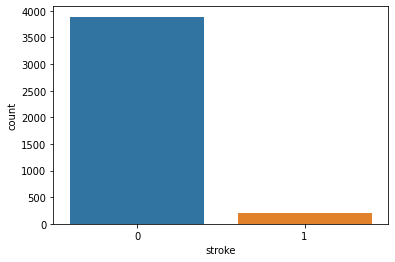

In [4]:
import seaborn as sns
import plotly.express as px

sns.color_palette('bright')
sns.countplot(x=train.stroke)

In [5]:
train.nlargest(10, 'avg_glucose_level')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1316,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1
2402,22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0
292,26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0
1745,10995,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0
3890,27626,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0
2305,13155,Female,67.0,1,0,Yes,Govt_job,Rural,263.56,26.3,never smoked,0
2019,71279,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1
3262,50070,Female,62.0,1,0,Yes,Self-employed,Rural,261.67,43.0,formerly smoked,0
2617,21534,Male,67.0,0,0,Yes,Private,Urban,260.85,NaN,Unknown,0
2488,47802,Male,28.0,0,0,No,Private,Urban,256.74,23.4,formerly smoked,0


<AxesSubplot:xlabel='age', ylabel='Count'>

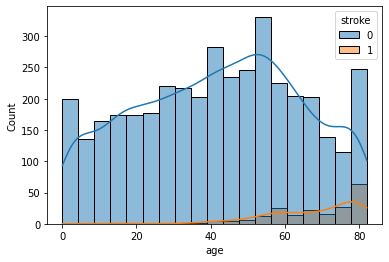

In [6]:
sns.histplot(train, x='age', hue='stroke', kde=True)

In [7]:
train['CategAge'] = pd.qcut(train.age, 19)
train[['CategAge', 'stroke']].groupby(['CategAge'], as_index = False).mean()

,CategAge,stroke
0,"(0.079, 5.0]",0.000000
1,"(5.0, 12.0]",0.000000
2,"(12.0, 17.0]",0.004525
3,"(17.0, 22.0]",0.000000
4,"(22.0, 26.0]",0.000000
5,"(26.0, 31.0]",0.000000
6,"(31.0, 35.0]",0.005051
7,"(35.0, 39.842]",0.018868
8,"(39.842, 43.0]",0.008584
9,"(43.0, 47.0]",0.020921


In [8]:
train[['hypertension', 'stroke']].groupby(['hypertension'], as_index = False).mean()

,hypertension,stroke
0,0,0.040216
1,1,0.130548


In [9]:
train[['heart_disease', 'stroke']].groupby(['heart_disease'], as_index = False).mean()

,heart_disease,stroke
0,0,0.041699
1,1,0.167401


In [10]:
train[['ever_married', 'stroke']].groupby(['ever_married'], as_index = False).mean()

,ever_married,stroke
0,No,0.013718
1,Yes,0.066593


<AxesSubplot:xlabel='work_type', ylabel='Count'>

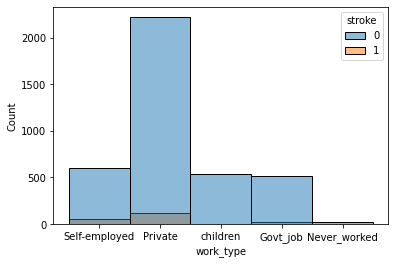

In [11]:
sns.histplot(train, x='work_type', hue='stroke')

In [12]:
train[['work_type', 'stroke']].groupby(['work_type'], as_index = False).mean()

,work_type,stroke
0,Govt_job,0.042672
1,Never_worked,0.000000
2,Private,0.051238
3,Self-employed,0.084485
4,children,0.001866


In [13]:
train[['Residence_type', 'stroke']].groupby(['Residence_type'], as_index = False).mean()

,Residence_type,stroke
0,Rural,0.043890
1,Urban,0.053289


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

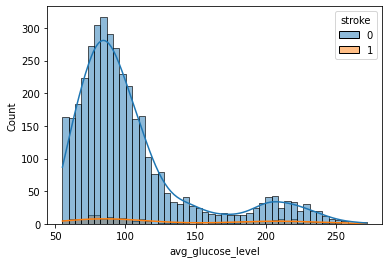

In [14]:
sns.histplot(train, x='avg_glucose_level', hue='stroke', kde=True)

<AxesSubplot:xlabel='avg_glucose_level'>

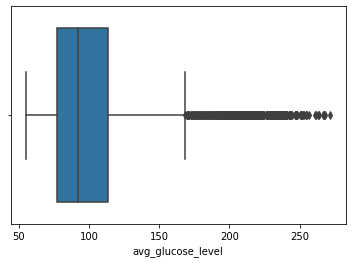

In [15]:
import seaborn as sns

sns.boxplot(x=train.avg_glucose_level)

In [16]:
train['CategGlucose'] = pd.cut(train.avg_glucose_level, 15)

train[['CategGlucose', 'stroke']].groupby(['CategGlucose'], as_index=False).mean()

,CategGlucose,stroke
0,"(54.903, 69.561]",0.038062
1,"(69.561, 84.003]",0.041801
2,"(84.003, 98.444]",0.031868
3,"(98.444, 112.885]",0.037520
4,"(112.885, 127.327]",0.023810
5,"(127.327, 141.768]",0.040323
6,"(141.768, 156.209]",0.021277
7,"(156.209, 170.651]",0.074074
8,"(170.651, 185.092]",0.125000
9,"(185.092, 199.533]",0.161290


In [17]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

train['NormGlucose'] = normalizer.fit_transform(train.avg_glucose_level.values.reshape(-1, 1))
train['NormGlucose'].nsmallest()

280     0.000000
3889    0.000462
1916    0.000508
3976    0.000646
2679    0.000739
Name: NormGlucose, dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

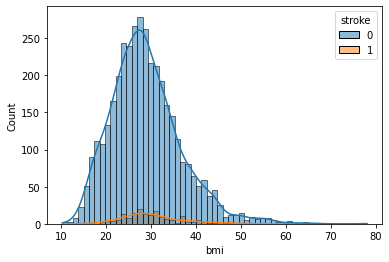

In [18]:
sns.histplot(train, x='bmi', hue='stroke', kde=True)

155


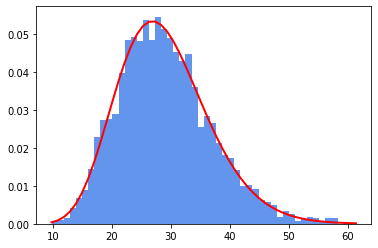

In [19]:
import matplotlib.pyplot as plt
import scipy.special as sps  

bmi_avg = train.bmi.mean()
bmi_std = train.bmi.std()
bmi_nan_count = train.bmi.isna().sum()
print(bmi_nan_count)

shape, scale = bmi_avg**2/bmi_std**2, bmi_std**2/bmi_avg

bmi_distr = np.random.gamma(shape, scale, train.shape[0])

count, bins, ignored = plt.hist(bmi_distr, 50, density=True, color='cornflowerblue')
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

In [20]:
print(f'BMI nan values ratio {round(bmi_nan_count/train.shape[0], 2)}')

BMI nan values ratio 0.04


<AxesSubplot:>

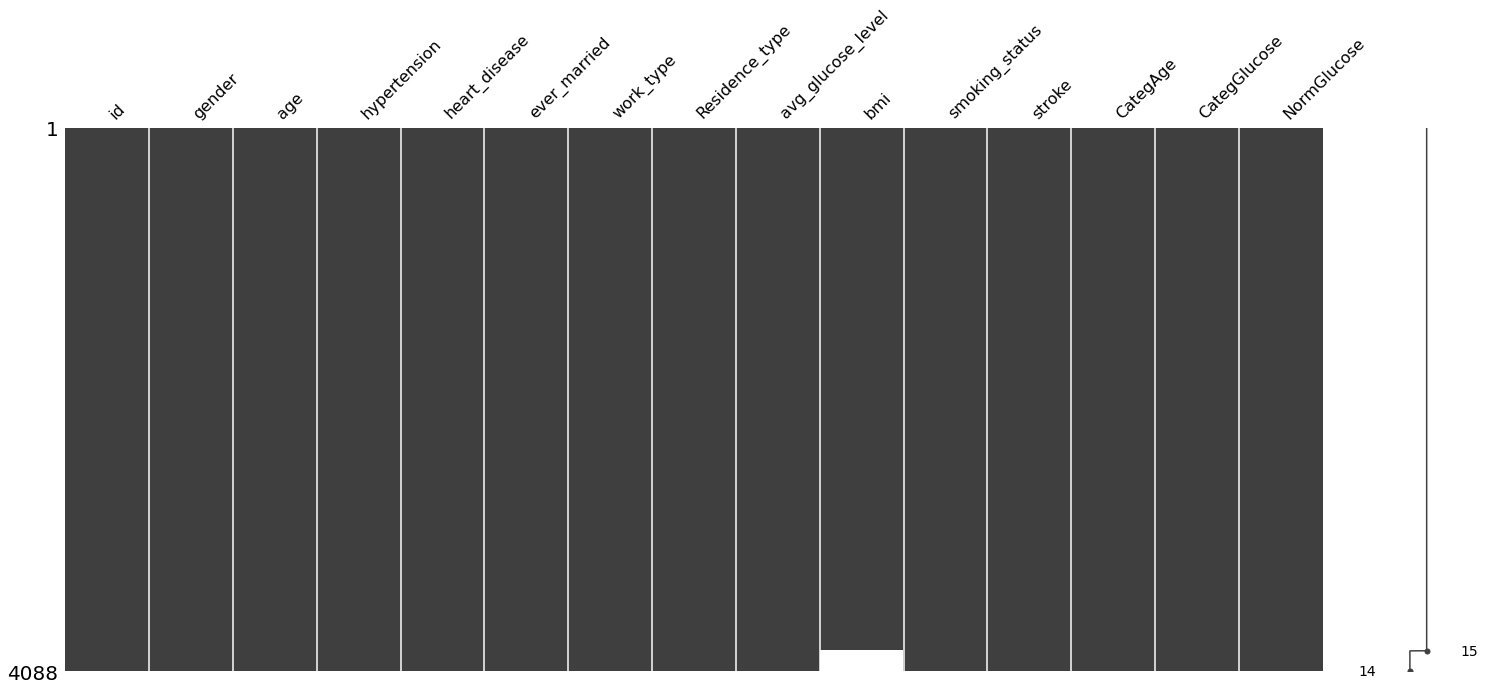

In [21]:
import missingno as msno

msno.matrix(train.sort_values(by='bmi', ascending=False))

In [22]:
bmi_fill_na = pd.Series(np.round(np.random.normal(70, bmi_std/2.0, bmi_nan_count),1), index=train[np.isnan(train.bmi)].index)
print(bmi_fill_na.nlargest(10))
train['bmi'] = train['bmi'].fillna(value=bmi_fill_na)

1143    77.6
2082    77.5
1410    77.4
1093    77.0
1463    76.6
2669    76.4
2941    76.0
3594    75.9
1180    75.8
3572    75.6
dtype: float64


In [23]:
train.bmi.nlargest(5)

2914    78.0
1143    77.6
2082    77.5
1410    77.4
1093    77.0
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

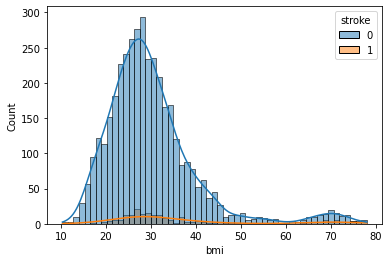

In [24]:
sns.histplot(train, x='bmi', hue='stroke', kde=True)

In [25]:
train['CategBMI'] = pd.cut(train.bmi, 10)

train[['CategBMI', 'stroke']].groupby(['CategBMI'], as_index=False).mean()

,CategBMI,stroke
0,"(10.232, 17.07]",0.007042
1,"(17.07, 23.84]",0.020761
2,"(23.84, 30.61]",0.051316
3,"(30.61, 37.38]",0.052573
4,"(37.38, 44.15]",0.038997
5,"(44.15, 50.92]",0.070000
6,"(50.92, 57.69]",0.025641
7,"(57.69, 64.46]",0.105263
8,"(64.46, 71.23]",0.204301
9,"(71.23, 78.0]",0.218182


<AxesSubplot:>

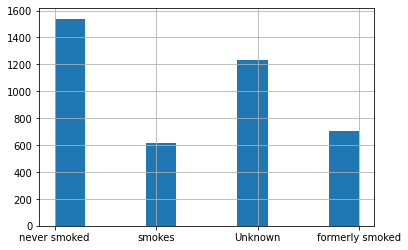

In [26]:
train.smoking_status.hist()

In [27]:
train[['smoking_status', 'stroke']].groupby(['smoking_status'], as_index = False).mean()

,smoking_status,stroke
0,Unknown,0.031656
1,formerly smoked,0.079433
2,never smoked,0.044834
3,smokes,0.057190


In [28]:
pd.crosstab(train.CategAge, train.work_type, values=train.stroke, aggfunc='mean')

work_type,Govt_job,Never_worked,Private,Self-employed,children
CategAge,,,,,
"(0.079, 5.0]",NaN,NaN,NaN,NaN,0.000000
"(5.0, 12.0]",NaN,NaN,NaN,0.000000,0.000000
"(12.0, 17.0]",0.000000,0.0,0.000000,0.000000,0.011905
"(17.0, 22.0]",0.000000,0.0,0.000000,0.000000,NaN
"(22.0, 26.0]",0.000000,0.0,0.000000,0.000000,NaN
"(26.0, 31.0]",0.000000,NaN,0.000000,0.000000,NaN
"(31.0, 35.0]",0.000000,NaN,0.006536,0.000000,NaN
"(35.0, 39.842]",0.000000,NaN,0.013158,0.100000,NaN
"(39.842, 43.0]",0.000000,NaN,0.006623,0.027778,NaN


In [29]:
CrossTabRes = pd.crosstab(train.heart_disease, train.hypertension,
            #values=train.stroke, aggfunc='mean'
            )
CrossTabRes

hypertension,0,1
heart_disease,,
0,3529,332
1,176,51


In [30]:
from scipy.stats import chi2_contingency, chi2

stat, p, dof, expected = chi2_contingency(CrossTabRes)
critical = chi2.ppf(.95, dof)
print('Test-statistic analysis')
if abs(stat) >= critical:
    print('Dependent')
else:
    print('Independent')
print('p-value analysis')    
if p <= .05:
    print('Dependent')
else:
    print('Independent')


Test-statistic analysis
Dependent
p-value analysis
Dependent


In [31]:
train['NormBMI'] = normalizer.fit_transform(train.bmi.values.reshape(-1, 1))
train['NormBMI'].nlargest()

2914    1.000000
1143    0.994092
2082    0.992614
1410    0.991137
1093    0.985229
Name: NormBMI, dtype: float64

In [32]:
train['NormBMI'].corr(train['NormGlucose'], method='pearson')

0.1797830687741112

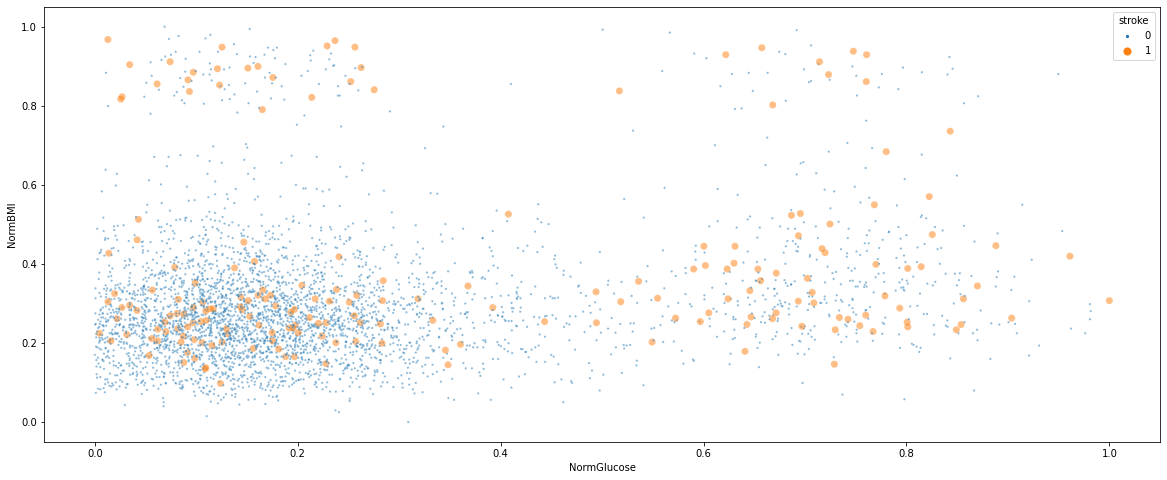

In [33]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.scatterplot(ax=ax, data=train, x='NormGlucose', y='NormBMI', hue='stroke', size='stroke', sizes=(50, 5), alpha=0.5)

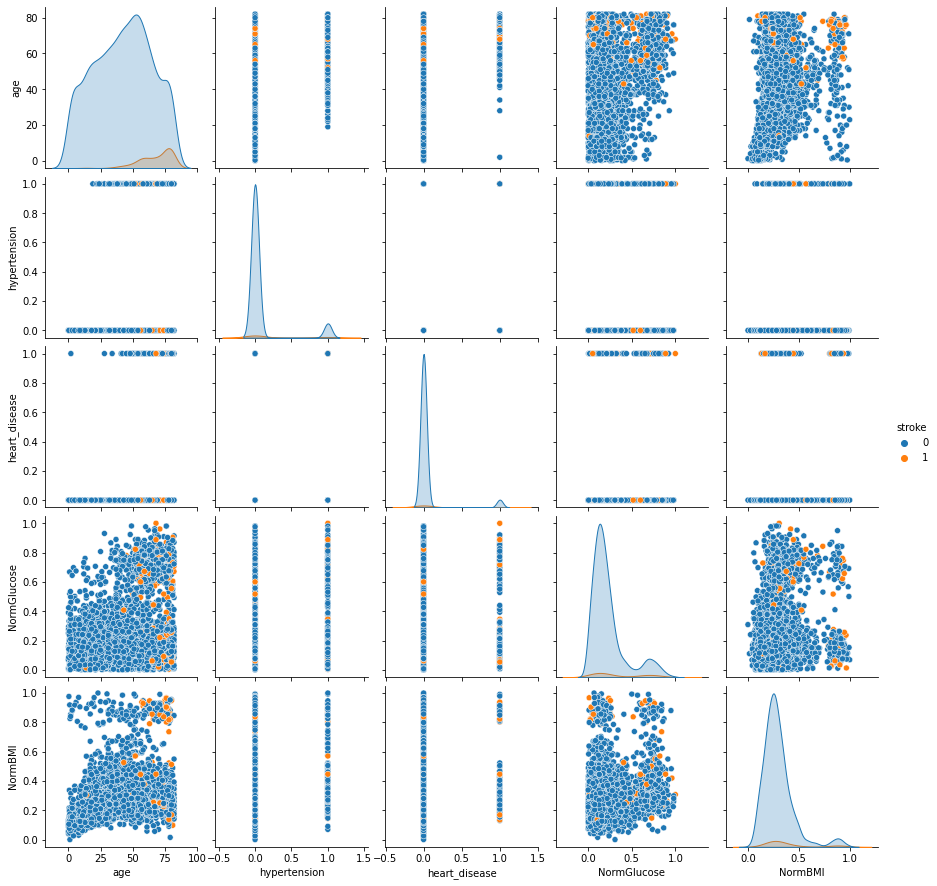

In [36]:
features=['age','hypertension','heart_disease','work_type','NormGlucose','NormBMI','smoking_status','stroke']
sns.pairplot(train[features], hue='stroke')

In [36]:
drop_elements = ['id', 'gender', 'Residence_type']

In [37]:
data = train.drop(axis=1, columns=drop_elements)